# Analyse results per group


In [25]:
import pickle
import matplotlib as plt
import os
from utils.basie_class import *
from scipy.stats import ttest_ind
import re

### Information

In [26]:
# path to results folder
foldpath ='/Users/emiliedolne/Downloads/all'

In [27]:
# list of each group
ctrl=['SHARA', 'ANDRU', 'SELGI', 'DUNPE', 'FARRO', 'LADAN', 'HUGRO', 'BLAJI','VANVE', 'BANCA', 'COHSH', 'FARSU', 'HEWDE', 'HOWCH', 'JONJO', 'MACJA', 'MCPCA', 'STRNE','JARNI','MATCH']
 
ad=['HEIBE', 'TALRU', 'THOAN2', 'JACAN', 'DOLST', 'HONJO', 'BROMA', 'HARJO6', 'BOIOL','VANSI', 'MCCSU', 'MCDMA', 'WOOCH','POTIA','BERAL','QUEMI','CHRRO','SMIRO2']
 
ivppa=['BLAAD', 'CHACH', 'JONGW', 'DISPA', 'CODJO', 'THIJO', 'HEWCO', 'HOUAN', 'PETMI','RATSI','ALLRO','RAMST']
print(f'Ctrl: {len(ctrl)}, AD: {len(ad)}, IVPPA: {len(ivppa)}');

Ctrl: 20, AD: 18, IVPPA: 12


In [28]:
# get a list of all patients in the results
listpatient=[]
for fold in os.listdir(foldpath):
    if '.DS_Store' not in fold:
        listpatient.append(''.join(re.findall('[A-Z]', fold)))

listpatient=list(set(listpatient))

In [29]:
# plot options
colorlist={}
colorlistflash={}

colorlist['ctrl']='b'
colorlist['ad']='r'
colorlist['ivppa']='g'
colorlistflash['ctrl']='aqua'
colorlistflash['ad']='mistyrose'
colorlistflash['ivppa']='lime'

### Load data

In [30]:
groups=['ctrl', 'ad', 'ivppa']

data={}
for igroup in groups:
    groupdata=[]
    i=0
    for patientID in eval(igroup):
        groupdata.append([])
        for fold in os.listdir(foldpath):
            if patientID in fold:
                groupdata[i].append(fold)
        if len(groupdata[i])==1:
            newfoldpath=os.path.join(foldpath,groupdata[i][0])
            groupdata[i]=[]
            for fold in os.listdir(newfoldpath):
                if patientID in fold:
                    groupdata[i].append(fold)
        i+=1
    data[igroup]=groupdata

## Start plots

### Overlapping psychometric functions

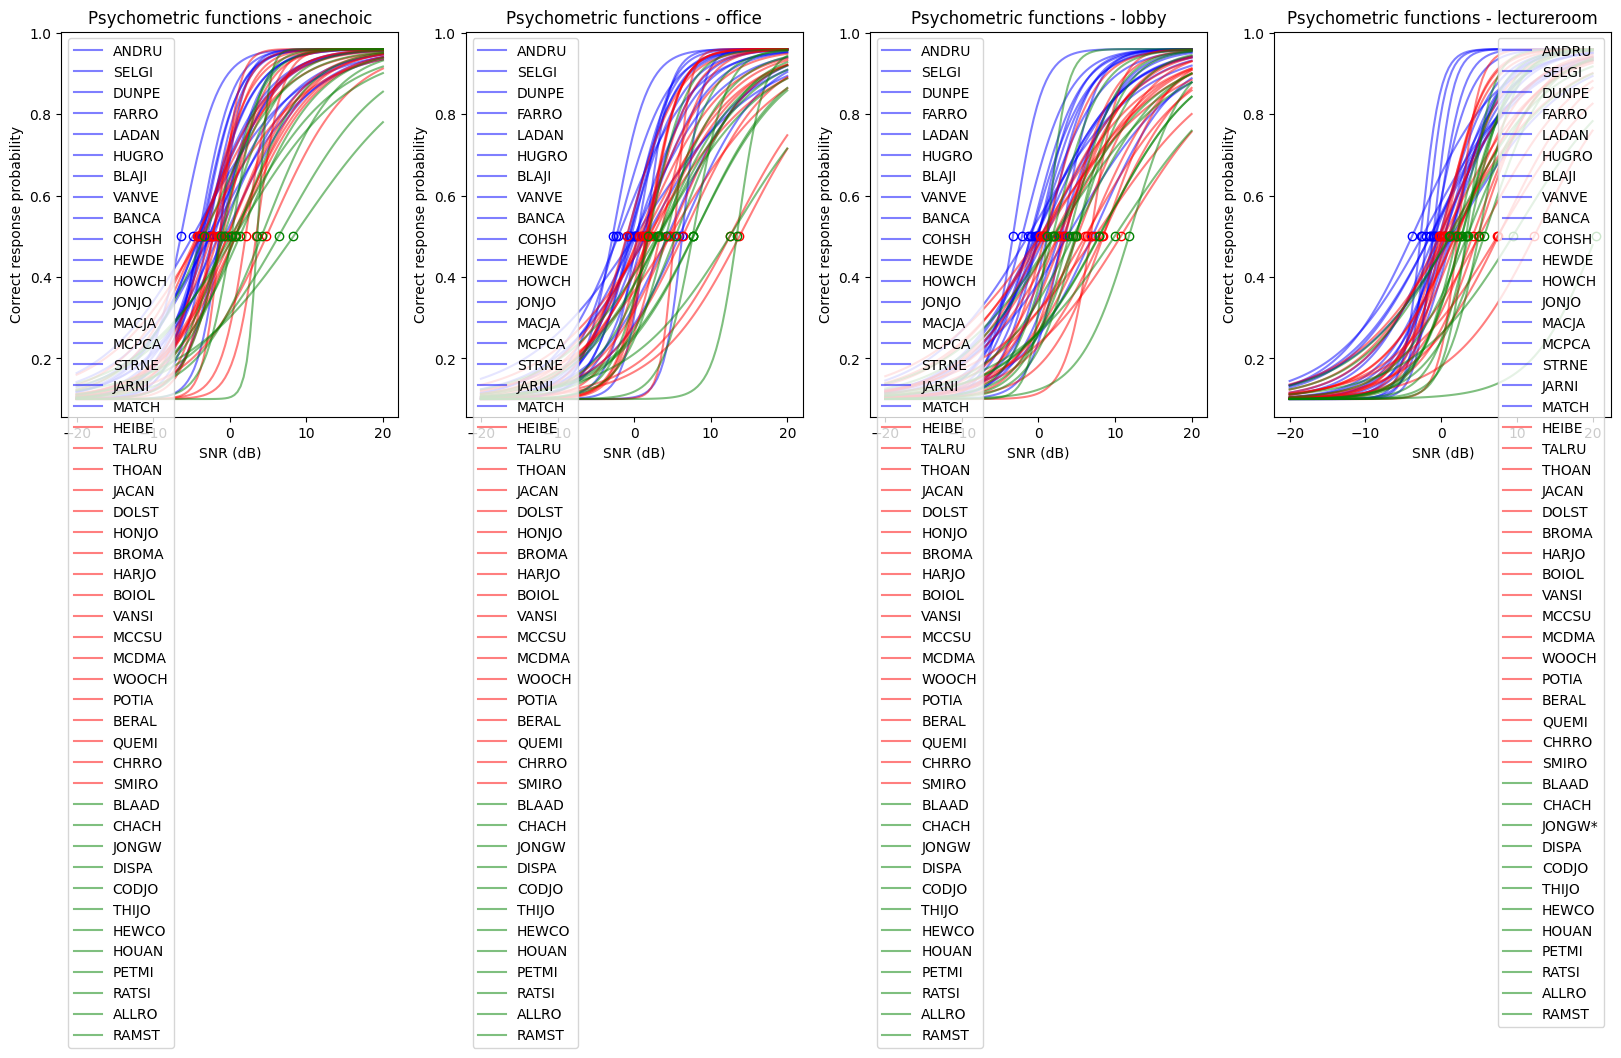

In [31]:
roomlist=['anechoic','office', 'lobby', 'lectureroom']

fig, axs=plt.subplots(nrows=1, ncols=len(roomlist), figsize=(5*len(roomlist),5))

iplot=0
for room in roomlist:
    plt.sca(axs[iplot])
    colorlist={}
    colorlist['ctrl']='b'
    colorlist['ad']='r'
    colorlist['ivppa']='g'
    
    patientlist=[]
    for igroup in groups:
        listperroom=[]
        filteredlist=data[igroup]
        for i in filteredlist:
            for j in i:
                if room in j:
                    listperroom.append(j)
                    
        estimatelist=[]
        timinglist=[]
        for ptnt in listperroom:
            patientlist.append(ptnt[0:5])
            for path, subdirs, files in os.walk(os.path.join(foldpath,ptnt)):
                for name in files:
                    if 'pkl' in name:
                        if 'paused' in name:
                            print('Warning: patient ' + patientlist[-1] +' took a pause in '+ ptnt[5:len(ptnt)])
                            patientlist[-1]+='*'
                        else:
                            timinglist.append(path.split('/')[-1])
                            with open(os.path.join(path,name), 'rb') as f:
                                [estimate, __, __, __, __]=pickle.load(f)
                                estimatelist.append(estimate)
        for i in range(len(estimatelist)):
            estimatelist[i].plot('f',0)
            plt.gca().lines[-2].set_color(colorlist[igroup])
            plt.gca().lines[-1].set_color(colorlist[igroup])
            plt.gca().lines[-2].set_alpha(0.5)

            ax = plt.gca()
    plt.title('Psychometric functions - ' + room)
    handles, labels = ax.get_legend_handles_labels()
    (ax.legend(handles, patientlist));
    iplot+=1
plt.savefig('psycfunc_allpatientspergroup.pdf', bbox_inches='tight')

### Mean psychometric functions

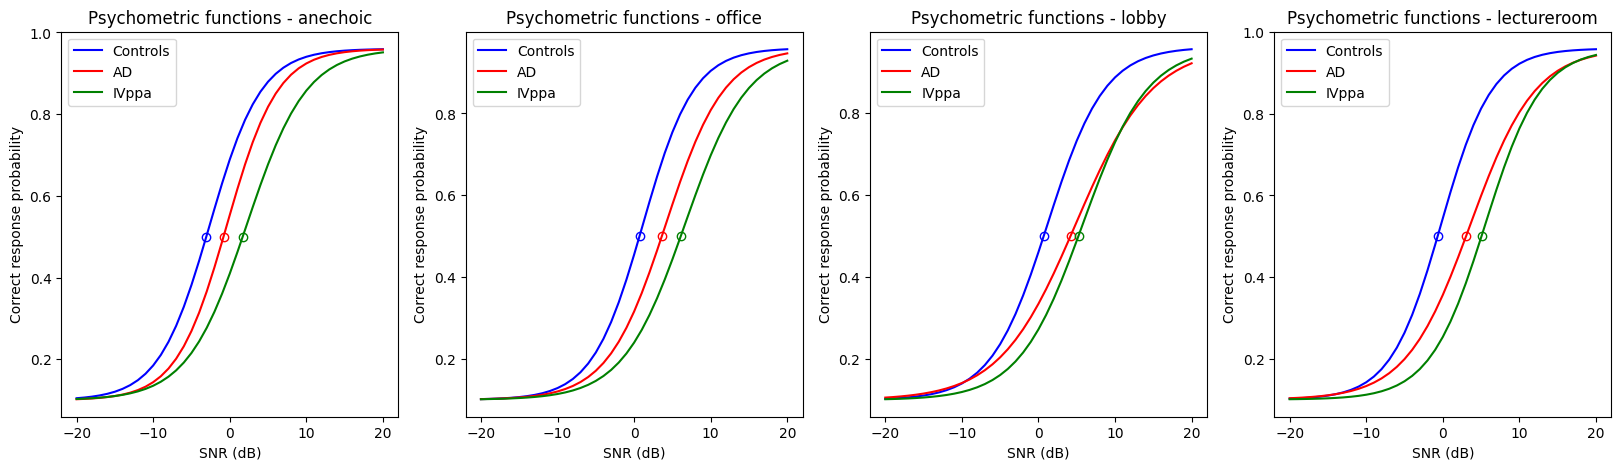

In [32]:
roomlist=['anechoic','office', 'lobby', 'lectureroom']

fig, axs=plt.subplots(nrows=1, ncols=len(roomlist), figsize=(5*len(roomlist),5))

iplot=0
availsnr=np.atleast_2d(np.linspace(-20, 20, 41))

srt={}
varsrt={}
slope={}
varslope={}


for room in roomlist:
    plt.sca(axs[iplot])
    patientlist=[]
    for igroup in groups:
        try:
            len(srt[igroup])
        except:
            srt[igroup]=[]
            varsrt[igroup]=[]
            slope[igroup]=[]
            varslope[igroup]=[]
        listperroom=[]
        filteredlist=data[igroup]
        for i in filteredlist:
            for j in i:
                if room in j:
                    listperroom.append(j)
        estimatelist=[]
        for ptnt in listperroom:
            patientlist.append(ptnt[0:5])
            for path, subdirs, files in os.walk(os.path.join(foldpath,ptnt)):
                for name in files:
                    if 'pkl' in name:
                        if 'paused' in name:
                            print('Warning: patient ' + patientlist[-1] +' took a pause in '+ ptnt[5:len(ptnt)])
                            patientlist[-1]+='*'
                        else:
                            timinglist.append(path.split('/')[-1])
                            with open(os.path.join(path,name), 'rb') as f:
                                [estimate, __, __, __, __]=pickle.load(f)
                                estimatelist.append(estimate)
        listsrt=[]
        listslope=[]
        listvarsrt=[]
        listvarslope=[]
        for i in range(len(estimatelist)):
            listsrt.append(estimatelist[i].summary()[-1][-1][3])
            listslope.append(estimatelist[i].summary()[-1][-1][4])
            listvarsrt.append(estimatelist[i].summary()[-1][-1][5])
            listvarslope.append(estimatelist[i].summary()[-1][-1][6])
        srt[igroup].append(listsrt)
        slope[igroup].append(listslope)
        varsrt[igroup].append(listvarsrt)
        varslope[igroup].append(listvarslope)
        
        params=estimatelist[0].summary()[0]
        meansrt=np.mean(listsrt)
        meanslope=np.e**(np.mean(listslope))

        estplot=v_psychofunc('', np.array([params[0], [meansrt], [meanslope], params[1], params[2], [1]]),
                    availsnr.T)
        plt.plot(estplot[1], estplot[0],color=colorlist[igroup], label="Estimated model {}".format(igroup+room))
        plt.plot(meansrt, params[0],'o', color=colorlist[igroup], markerfacecolor='none')

    ptntlist=['Controls', 'AD', 'IVppa']
    ax = plt.gca()
    plt.title('Psychometric functions - ' + room)
    handles, labels = ax.get_legend_handles_labels()
    (ax.legend(handles,ptntlist));
    plt.xlabel('SNR (dB)')
    plt.ylabel('Correct response probability')
    iplot+=1

plt.savefig('psycfunc_meanpergroup.pdf', bbox_inches='tight')

### Box plots

------- ctrl  vs  ad -------
anechoic :  TtestResult(statistic=-3.2711354677697577, pvalue=0.0024595874690825446, df=34.0)
office :  TtestResult(statistic=-2.652356817181602, pvalue=0.01205785057772118, df=34.0)
lobby :  TtestResult(statistic=-3.6036421501466243, pvalue=0.000991905780311631, df=34.0)
lectureroom :  TtestResult(statistic=-4.167047864161433, pvalue=0.00020890604289073336, df=33.0)
------- ctrl  vs  ivppa -------
anechoic :  TtestResult(statistic=-5.412703291185309, pvalue=8.985273983176549e-06, df=28.0)
office :  TtestResult(statistic=-4.659733374708013, pvalue=7.028931987770868e-05, df=28.0)
lobby :  TtestResult(statistic=-4.189431621566287, pvalue=0.0002523607879081989, df=28.0)
lectureroom :  TtestResult(statistic=-4.328150610059996, pvalue=0.0001733513373218369, df=28.0)
------- ad  vs  ivppa -------
anechoic :  TtestResult(statistic=-2.335576274688346, pvalue=0.02690388118079746, df=28.0)
office :  TtestResult(statistic=-1.7152499817904867, pvalue=0.0973477233941380

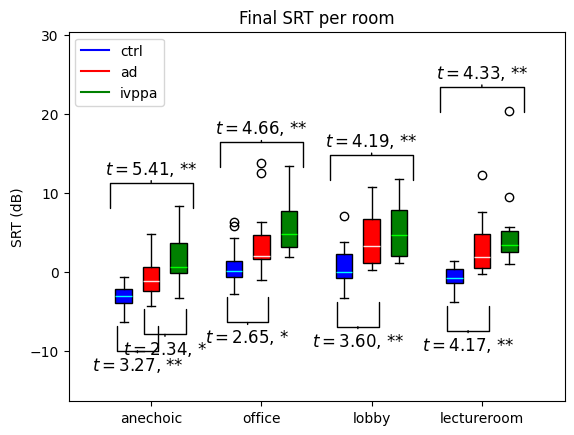

In [33]:
ax = plt.axes()

toplot=srt
pos={}
pos['ad']=[0, 2, 4, 6]
pos['ctrl']=[-0.5, 1.5, 3.5, 5.5]
pos ['ivppa']=[0.5, 2.5, 4.5, 6.5]

for k,igroup in enumerate(groups):
    bplot=plt.boxplot(toplot[igroup], positions=pos[igroup], widths=0.3, patch_artist=True)
    for patch in bplot['boxes']:
        patch.set_facecolor(colorlist[igroup])
    for median in bplot['medians']:
        median.set_color(colorlistflash[igroup])

plt.xticks(ticks=[0,2,4,6],labels=roomlist,rotation=0)  # Rotate labels for better readability
plt.title('Final SRT per room')
plt.ylabel('SRT (dB)')

globalmax=0
globalmin=0
for i,igroup in enumerate(groups):
    for j,jgroup in enumerate(groups[i+1:]):
        print('-------', igroup,' vs ', jgroup,'-------')
        for k,room in enumerate(roomlist):
            res = ttest_ind(toplot[igroup][k], toplot[jgroup][k], equal_var=True, alternative='two-sided') 
            maxval=max(max([toplot[igroup][k], toplot[jgroup][k]]))
            minval=min(min([toplot[igroup][k], toplot[jgroup][k]]))
            
            globalmax=(max([maxval, globalmax]))
            globalmin=(min([minval, globalmin]))
            if res[1]<0.05:
                signlbl=rf'$t={-res[0]:2.2f}$, *'
                if res[1]<0.005:
                    signlbl=rf'$t={-res[0]:2.2f}$, **'
                centerpos=pos[igroup][k]+0.5*abs(pos[igroup][k]-pos[jgroup][k])
                whisklength=2.5*abs(pos[igroup][k]-pos[jgroup][k])
                arwstyle=rf'-[, widthB={whisklength}, lengthB=1.5'

                if whisklength<2:
                    ypos1=minval-3.6
                    ypos2=minval-4.2
                    vastyle='top'
                else:
                    ypos1=maxval+3.0
                    ypos2=maxval+3.6
                    vastyle='bottom'
                ax.annotate(signlbl, xy=(centerpos, ypos1),
                            xytext=(centerpos, ypos2), xycoords='data', 
                fontsize=12, ha='center', va=vastyle,
                arrowprops=dict(arrowstyle=arwstyle, lw=1.0, color='k'))
            print(room,': ', res)

h=[]
for igroup in groups:
    h1, = plt.plot([1,1], colorlist[igroup])
    h.append(h1)
plt.legend((h), groups, loc='upper left')
for i in h:
    i.set_visible(False)

plt.ylim([globalmin-10, globalmax+10])
plt.xlim([pos['ctrl'][0]-1, pos['ivppa'][-1]+1])
# plt.show()
plt.savefig('boxplot_SRT_per_room.pdf', bbox_inches='tight')

NameError: name 'group_labels' is not defined

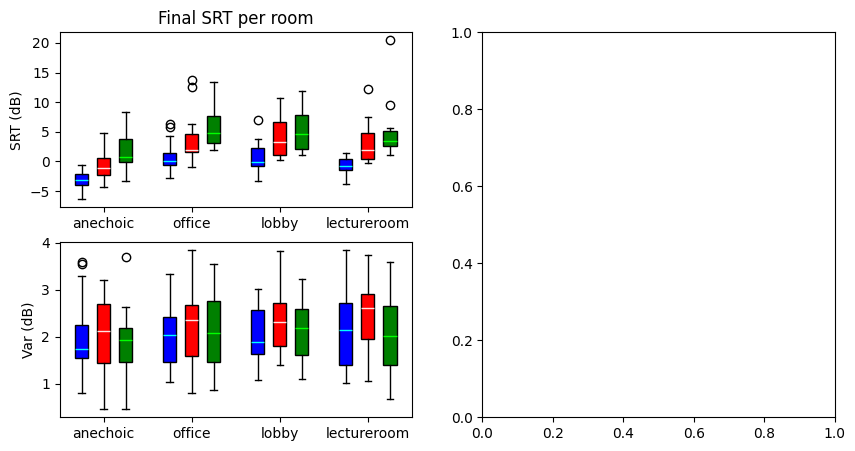

In [34]:
fig=plt.figure(figsize=(10,5))

gs = fig.add_gridspec(2,2, wspace=0.2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

# plot the final SRT
plt.sca(ax1)
pos={}
pos['ad']=[0, 2, 4, 6]
pos['ctrl']=[-0.5, 1.5, 3.5, 5.5]
pos ['ivppa']=[0.5, 2.5, 4.5, 6.5]

for k,igroup in enumerate(groups):
    bplot=plt.boxplot(srt[igroup], positions=pos[igroup], widths=0.3, patch_artist=True)
    for patch in bplot['boxes']:
        patch.set_facecolor(colorlist[igroup])
    for median in bplot['medians']:
        median.set_color(colorlistflash[igroup])

plt.xticks(ticks=[0,2,4,6],labels=roomlist,rotation=0)  # Rotate labels for better readability
plt.title('Final SRT per room')
plt.ylabel('SRT (dB)')

# plot the var of SRT
plt.sca(ax2)
for k,igroup in enumerate(groups):
    bplot=plt.boxplot(varsrt[igroup], positions=pos[igroup], widths=0.3, patch_artist=True)
    for patch in bplot['boxes']:
        patch.set_facecolor(colorlist[igroup])
    for median in bplot['medians']:
        median.set_color(colorlistflash[igroup])

plt.xticks(ticks=[0,2,4,6],labels=roomlist,rotation=0)  # Rotate labels for better readability
plt.ylabel('Var (dB)')
# plt.show()

plt.sca(ax3)
ax=ax3
k=0

for j,room in enumerate(roomlist):
    srt_levels=[]
    variances=[]
    for igroup in groups:
        srt_levels.append(np.array(srt[igroup][j]))
        variances.append(np.array(varsrt[igroup][j]))
    for i, (srti, variance) in enumerate(zip(srt_levels, variances)):
        x = np.full(srti.shape, 0.5*i+k)  # Assign all data points in a group the same x-value for grouping
        ax.scatter(x, srti, label=group_labels[i] if j==0 else None, color=colorlist[groups[i]])
        ax.errorbar(x, srti, yerr=np.sqrt(variance), fmt='o', capsize=5, color=colorlist[groups[i]])  # Use square root of variance to get standard deviation
        mean_srt = np.mean(srti)
        ax.hlines(mean_srt, 0.5*i+k-0.2, 0.5*i+k+0.2, colors='k', linestyles='dashed')
        median_srt = np.median(srti)
        ax.hlines(median_srt, 0.5*i+k-0.2, 0.5*i+k+0.2, colors='k', linestyles='dotted')
    k+=2
    
ax.set_xticks(np.arange(0.25,7,2))
ax.set_xticklabels(roomlist)
ax.set_ylabel('SRT (dB)')
ax.legend()
ax.set_title(r'Individual results (SRT $\pm$ std)')
# plt.show();
plt.savefig('boxplot_SRT_with_uncertainty.pdf', bbox_inches='tight')